In [1]:
## imports, params, funcs

import os
import numpy as np
import matplotlib.pyplot as plt
from math import gamma, pi
from matplotlib.patches import Rectangle
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
from matplotlib.patches import Ellipse
from matplotlib.patches import Circle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = True

path = os.getcwd()
print(path)

folder_in_1 = path+'/fig_1/'
folder_out_1 = path+'/fig_1/'
folder_in_2 = path+'/fig_2/'
folder_out_2 = path+'/fig_2/'
folder_in_3 = path+'/fig_3/'
folder_out_3 = path+'/fig_3/'
folder_in_7 = path+'/fig_7/'
folder_out_7 = path+'/fig_7/'
folder_in_8 = path+'/fig_8/'
folder_out_8 = path+'/fig_8/'
folder_in_9 = path+'/fig_9/'
folder_out_9 = path+'/fig_9/'

def read_data(fname, usecols=None):

    data = np.loadtxt(fname, usecols=usecols)

    return np.transpose(data)

C:\Users\franc\projects\vector_hopfield\plots\figures_paper


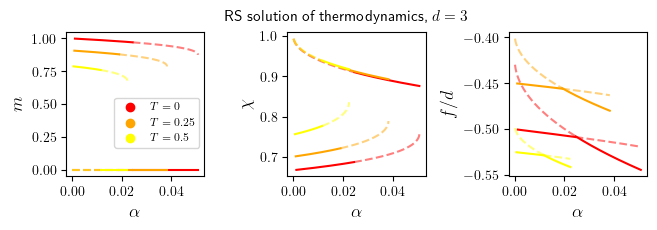

In [4]:
## fig 1: RS thermodynamic solution

fig, axs = plt.subplots(1, 3, figsize=(7.5, 1.875))

fig.subplots_adjust(wspace=0.6, hspace=0.4)

for i in range(3):

    axs[i].set_xlabel("$ \\alpha $", fontsize=13)

axs[0].set_ylabel("$ m $", fontsize=13)
axs[1].set_ylabel("$ \\chi $", fontsize=13)
axs[2].set_ylabel("$ f/d $", fontsize=13)

Ts = [0, 0.25, 0.5]
colors = {0:"red", 0.25:"orange", 0.5:"yellow"}
d=3

for T in Ts:

    fname = folder_in_1+f'observables_T={T}_d=3_retrieval.dat'
    alpha_retr, m_retr, chi_retr, f_retr = read_data(fname)

    ac = np.max(alpha_retr)
    site = np.argmax(alpha_retr)

    alpha_retr = np.flip(alpha_retr[site:])
    m_retr = np.flip(m_retr[site:])
    chi_retr = np.flip(chi_retr[site:])
    f_retr = np.flip(f_retr[site:])

    fname = folder_in_1+f'observables_T={T}_d=3_NOretrieval.dat'
    alpha_noretr, chi_noretr, f_noretr = read_data(fname)

    site = np.argmin((ac-alpha_noretr)**2)
    alpha_noretr = alpha_noretr[:site+1]
    chi_noretr = chi_noretr[:site+1]
    f_noretr = f_noretr[:site+1]

    f_retr_interp = interp1d(alpha_retr, f_retr, kind='linear')
    f_noretr_interp = interp1d(alpha_noretr, f_noretr, kind='linear')

    x = np.linspace(alpha_retr[0], alpha_noretr[-1], 10**5)

    mm = np.min((f_retr_interp(x)-f_noretr_interp(x))**2)
    am = np.where((f_retr_interp(x)-f_noretr_interp(x))**2==mm)[0][0]*alpha_retr[-1]/10**5
    
    axs[0].plot(alpha_retr[alpha_retr <= am], m_retr[alpha_retr <= am], color=colors[T])
    axs[1].plot(alpha_retr[alpha_retr <= am], chi_retr[alpha_retr <= am]/d, color=colors[T])
    axs[2].plot(alpha_retr[alpha_retr <= am], f_retr[alpha_retr <= am], color=colors[T])

    axs[0].plot(alpha_retr[alpha_retr > am], m_retr[alpha_retr > am], color=colors[T], linestyle="--", alpha=0.5)
    axs[1].plot(alpha_retr[alpha_retr > am], chi_retr[alpha_retr > am]/d, color=colors[T], linestyle="--", alpha=0.5)
    axs[2].plot(alpha_retr[alpha_retr > am], f_retr[alpha_retr > am], color=colors[T], linestyle="--", alpha=0.5)
    
    axs[0].plot(alpha_noretr[alpha_noretr <= am], np.zeros(alpha_noretr.size)[alpha_noretr <= am], color=colors[T], linestyle="--", alpha=0.5)
    axs[1].plot(alpha_noretr[alpha_noretr <= am], chi_noretr[alpha_noretr <= am]/d, color=colors[T], linestyle="--", alpha=0.5)
    axs[2].plot(alpha_noretr[alpha_noretr <= am], f_noretr[alpha_noretr <= am], color=colors[T], linestyle="--", alpha=0.5)

    axs[0].plot(alpha_noretr[alpha_noretr > am], np.zeros(alpha_noretr.size)[alpha_noretr > am], color=colors[T])
    axs[1].plot(alpha_noretr[alpha_noretr > am], chi_noretr[alpha_noretr > am]/d, color=colors[T])
    axs[2].plot(alpha_noretr[alpha_noretr > am], f_noretr[alpha_noretr > am], color=colors[T])

    axs[0].scatter(np.zeros(0), np.zeros(0), label=f"$T={T}$", color=colors[T])

axs[0].legend(loc=(0.35, 0.2), fontsize=8)
fig.suptitle(f"RS solution of thermodynamics, $d={d}$", fontsize=11, y=1.)

plt.savefig(folder_out_1+"RS_solution_thermodynamics_d=3.png", bbox_inches="tight", dpi=600)
plt.show()


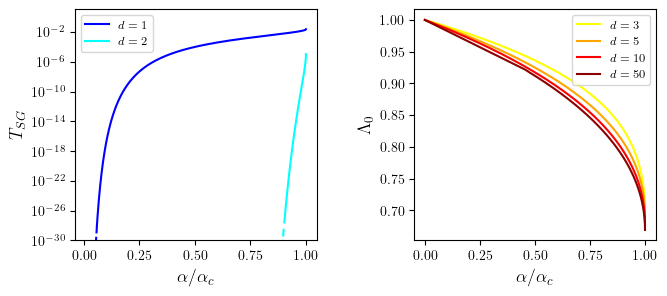

In [5]:
## fig 2: dAT line d=1, 2 e repliconi vari d

fig, axs = plt.subplots(1, 2, figsize=(7.5, 3.))

fig.subplots_adjust(wspace=0.4)

axs[1].set_xlabel("$ \\alpha/\\alpha_c $", fontsize=13)
axs[1].set_ylabel("$ \\Lambda_0 $", fontsize=13)

axs[0].set_yscale("log")
axs[0].set_ylim(bottom=1e-30)
axs[0].set_xlabel("$ \\alpha/\\alpha_c $", fontsize=13)
axs[0].set_ylabel("$ T_{SG} $", fontsize=13)

ds = [3, 5, 10, 50]
colors = {3:"yellow", 5:"orange", 10:"red", 50:"darkred"}

for d in ds:

    fname = folder_in_2+f"Replicons_T=0_d={d}_retrieval.dat"
    alpha_retr, Repl0 = read_data(fname)

    site = np.argmax(alpha_retr)
    ac = alpha_retr[site]

    alpha_retr = alpha_retr[site:]
    Repl0 = Repl0[site:]

    if d==50:

        alpha_retr = alpha_retr[:-100]
        Repl0 = Repl0[:-100]

    alpha_retr = np.concatenate((alpha_retr, [0.]))
    Repl0 = np.concatenate((Repl0, [1.]))

    axs[1].plot(alpha_retr/ac, Repl0, label=f"$ d={d} $", color=colors[d])

colors={1:"blue", 2:"aqua"}

for d in range(1,3):

    fname = folder_in_2+f"datLineMemories_vecHopNonIso_d={d}.dat"
    alpha, Tc = read_data(fname)

    axs[0].plot(alpha[Tc>1e-28]/alpha[0], Tc[Tc>1e-28], label=f"$ d={d} $", color=colors[d])
    axs[0].plot(alpha[Tc<=1e-28]/alpha[0], Tc[Tc<=1e-28], linestyle="--", color=colors[d])

axs[1].legend(loc="upper right", fontsize=8.5)
axs[0].legend(loc="upper left", fontsize=8.5)

plt.savefig(folder_out_2+"Replicons_retrieval_T=0_several_d.png", bbox_inches="tight", dpi=600)

plt.show()


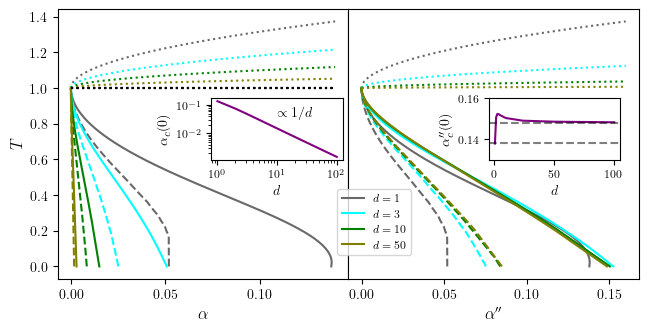

In [6]:
## fig 3: phase diagram

fig, axs = plt.subplots(1, 2, figsize=(7.5, 3.5))

fig.subplots_adjust(wspace=0.)

dims=[1, 3, 10, 50]
cols={1:"dimgray", 3:"cyan", 5:"blue", 10:"green", 50:"olive"}

axs[0].set_ylabel("$ T $", fontsize=12)
axs[0].set_xlabel("$ \\alpha $", fontsize=12)
axs[1].set_xlabel("$ \\alpha'' $", fontsize=12)
axs[1].set_yticks([])

for d in dims:

    fname = folder_in_3+f"retrievalLine_vecHopNonIso_d={d}.dat"
    data = read_data(fname)

    asRetrSp=data[0]
    TsRetrSp=data[1]

    fname = folder_in_3+f"firstOrderLineMemories_vecHopNonIso_d={d}.dat"
    data = read_data(fname)

    asRetrI=data[0]
    TsRetrI=data[1]

    axs[0].plot(asRetrSp/d, TsRetrSp, color=cols[d])
    axs[0].plot(asRetrI/d, TsRetrI, color=cols[d], linestyle="dashed")
    axs[0].plot(np.zeros(0), np.zeros(0), color=cols[d], label=f"$ d={d} $")

    axs[0].plot(np.linspace(0., 0.14, 1000), 1+np.sqrt(np.linspace(0., 0.14, 1000))/np.sqrt(d), color=cols[d], linestyle="dotted")
    axs[0].plot(np.linspace(0., 0.14, 1000), np.ones(1000), color="black", linestyle="dotted")

    axs[1].plot(asRetrSp, TsRetrSp, color=cols[d])
    axs[1].plot(asRetrI, TsRetrI, color=cols[d], linestyle="dashed")
    axs[1].plot(np.linspace(0., 0.16, 1000), 1+np.sqrt(np.linspace(0., 0.14, 1000))/d, color=cols[d], linestyle="dotted")

fname = folder_in_3+'alphacritT0_VS_d.dat'
data = read_data(fname)
dims = data[0]
ac = data[1]

inset1=plt.axes((0.33,0.45,0.175,0.175))

inset1.set_yscale("log")
inset1.set_xscale("log")

inset1.set_xlabel("$ d $", fontsize=10)
inset1.set_ylabel("$ \\alpha_c(0) $", fontsize=10)
inset1.text(10.,0.04,"$ \\propto 1/d $", fontsize=10)
inset1.plot(dims, ac/dims, color="purple")
inset1.tick_params(labelsize=8)

inset2=plt.axes((0.7,0.45,0.175,0.175))

inset2.set_ylim(0.13, 0.16)
inset2.set_xlabel("$ d $", fontsize=10)
inset2.set_ylabel("$ \\alpha_c''(0) $", fontsize=10)
inset2.plot(dims, ac, color="purple")
inset2.tick_params(labelsize=8)

inset2.axhline(0.138, color="black", alpha=0.5, linestyle="dashed")
inset2.axhline(0.148, color="black", alpha=0.5, linestyle="dashed")

fig.legend(loc=(0.52, 0.23), fontsize=8)

plt.savefig(folder_out_3+"phaseDiag_growingd.png", bbox_inches="tight")

plt.show()

M 0.014319692200069959
M 0.022608695652173917
M 0.03243325705568268
SG 0.10638460810704871


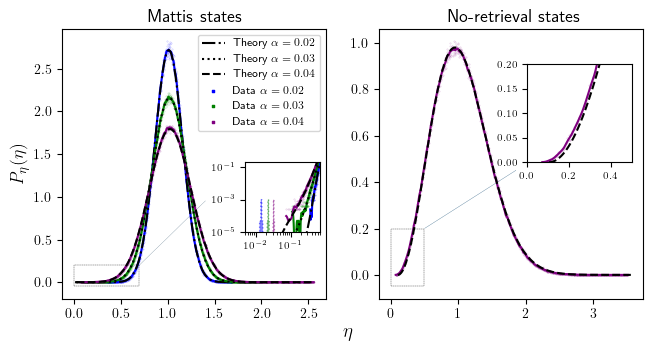

In [2]:
## fig 7: pdf of local fields

d=3
alphas=np.array([0.02, 0.03, 0.04])
Ps=[80, 120, 160]
N=4000

colors = ["blue", "green", "purple"]
linestyles = ["dashdot", "dotted", "dashed"]

chis_Matthis = np.array([2.047, 2.080, 2.126]) ## soluzione rs chi

onsagers_Matthis = alphas/d*chis_Matthis/(d-chis_Matthis)

c = (d-1)*(gamma((d-1)/2)/gamma(d/2))/np.sqrt(2)
onsagers_SG = np.sqrt(alphas)*c/d

fig, axs = plt.subplots(1, 2, figsize=(7.5, 3.5))

fig.subplots_adjust(wspace=0.2)

inset1 = plt.axes((0.37, 0.3, 0.10, 0.2))
inset1.set_xlim(left=0.005, right=0.7)
inset1.set_ylim(bottom=1e-05, top=0.2)
inset1.set_xscale("log")
inset1.set_yscale("log")
inset1.tick_params(labelsize=7)

inset2 = plt.axes((0.745, 0.5, 0.14, 0.28))
inset2.set_xlim(0., 0.5)
inset2.set_ylim(0., 0.2)
inset2.tick_params(labelsize=7)

count = 0

for alpha in alphas:

    P = Ps[count]

    fname = folder_in_7+f"histogram_local_fields_magnitudes_N{N}_d{d}_P{P}_CloseToPattern_minima.txt"
    data = read_data(fname)
    
    local_fields_Matthis = data[0]
    density_empirical_Matthis = data[1]

    fname = folder_in_7+f"pdf_cavity_fields_magnitudes_d={d}_alpha={alpha}_CloseToPattern.txt"
    data = read_data(fname)
    
    cavity_fields_Matthis = data[0]
    density_theory_Matthis = data[1]

    onsager_Matthis = onsagers_Matthis[count]
    print("M", onsager_Matthis)
    
    axs[0].scatter(local_fields_Matthis, density_empirical_Matthis, marker="x", alpha=0.1, color=colors[count], s=0.5)
    axs[0].plot(local_fields_Matthis, gaussian_filter1d(density_empirical_Matthis, sigma=3.), color=colors[count], lw=1.5)
    axs[0].scatter(np.zeros(0), np.zeros(0), marker="x", color=colors[count], label=f"Data $\\alpha={alpha}$", s=3.5)
    axs[0].plot(cavity_fields_Matthis+onsager_Matthis, density_theory_Matthis, color="black", linestyle= linestyles[count], label=f"Theory $\\alpha={alpha}$", linewidth=1.5)
    inset1.scatter(local_fields_Matthis, density_empirical_Matthis, marker="x", alpha=0.1, color=colors[count], s=0.5)
    inset1.plot(local_fields_Matthis, gaussian_filter1d(density_empirical_Matthis, sigma=3.), color=colors[count])
    inset1.plot(cavity_fields_Matthis+onsager_Matthis, density_theory_Matthis, color="black", linestyle= linestyles[count], label=f"Theory $\\alpha={alpha}$", linewidth=1.5)
    inset1.arrow(x=onsager_Matthis, y=1e-03, dx=0., dy=-0.00095, color=colors[count], linestyle="dotted", alpha=0.5, length_includes_head=False)
      
    if alpha == 0.04:

        fname = folder_in_7+f"histogram_local_fields_magnitudes_N{N}_d{d}_P{P}_farFromPatterns_minima.txt"
        data = read_data(fname)

        local_fields_SG = data[0]
        density_empirical_SG = data[1]

        cavity_fields_SG = np.linspace(0., 3.45, 10**4)
        density_theory_SG = 2*pi**(d/2)/gamma(d/2)*cavity_fields_SG**(d-1)*np.exp(-cavity_fields_SG**2*d**2/(2*(c+np.sqrt(alpha))**2))/(2*pi*(c+np.sqrt(alpha))**2/d**2)**(d/2)
        onsager_SG = onsagers_SG[count]
        print("SG", onsager_SG)
        
        axs[1].scatter(local_fields_SG, density_empirical_SG, marker="x", alpha=0.1, color=colors[count], s=0.5)
        axs[1].plot(local_fields_SG, gaussian_filter1d(density_empirical_SG, sigma=3.), color=colors[count], lw=1.5)
        axs[1].plot(cavity_fields_SG+onsager_SG, density_theory_SG, color="black", linestyle= linestyles[count], label=f"Theory $\\alpha={alpha}$", linewidth=1.5)
        inset2.scatter(local_fields_SG, density_empirical_SG, marker="x", alpha=0.1, color=colors[count], s=0.5)
        inset2.plot(local_fields_SG, gaussian_filter1d(density_empirical_SG, sigma=3.), color=colors[count])
        inset2.plot(cavity_fields_SG+onsager_SG, density_theory_SG, color="black", linestyle= linestyles[count], label=f"Theory $\\alpha={alpha}$", linewidth=1.5)
    
    count += 1

fig.text(0.5, 0., "$ \\eta $", fontsize=14)
axs[0].set_ylabel("$ P_{\\eta}(\\eta) $", fontsize=13)
fig.text(0.24, 0.9, "Mattis states", fontsize=13)
fig.text(0.64, 0.9, "No-retrieval states", fontsize=13)

axs[0].add_patch(Rectangle((0.0, -0.05), 0.7, 0.25, fill=False, linestyle="--", linewidth=0.25))
axs[1].add_patch(Rectangle((0.0, -0.05), 0.5, 0.25, fill=False, linestyle="--", linewidth=0.25))

axs[0].arrow(x=.7, y=.2, dx=.7, dy=.75, linestyle="--", linewidth=0.05)
axs[1].arrow(x=.5, y=.2, dx=1.35, dy=.25, linestyle="--", linewidth=0.05)

axs[0].legend(loc="upper right", fontsize=8.)

fname = folder_out_7+f"pdf_local_fields_compare_data_theory_Matthis_and_SG_d={d}.png"
plt.savefig(fname, dpi=1000, bbox_inches="tight")

plt.show()

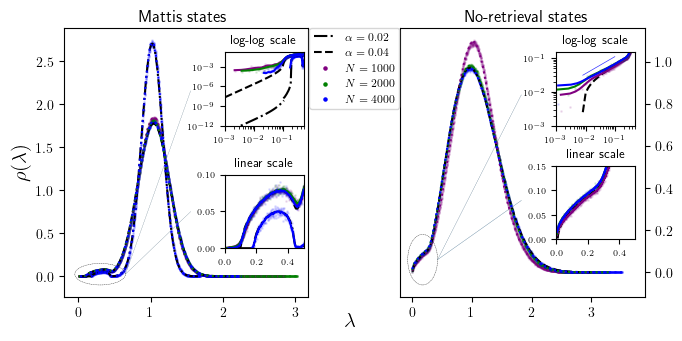

In [3]:
##fig 8: spectral density

fig, axs = plt.subplots(1, 2, figsize=(7.5, 3.5))
fig.subplots_adjust(wspace=0.375)
axs[1].yaxis.tick_right()
axs[1].set_xlim(left=-0.2, right=3.9)

Ns = [1000, 2000, 4000]

cols = {1000: "purple", 2000: "green", 4000: "blue"}

fig.text(0.5, 0.025, "$ \\lambda $", fontsize=15)
axs[0].set_ylabel("$ \\rho(\\lambda) $", fontsize=15)

ax1ylimtop=1.

inset1=plt.axes((0.34, 0.25, 0.105, 0.21))
inset1.set_xlim(0, 0.5)
inset1.set_ylim(0, 0.1)
inset1.set_title("linear scale", fontsize=9)
inset1.tick_params(labelsize=6)
inset1.set_yticks([0.00, 0.05, 0.10])

inset2=plt.axes((0.34, 0.6, 0.105, 0.21))
inset2.set_xscale("log")
inset2.set_yscale("log")
inset2.set_xlim(1e-3, 0.5)
inset2.set_ylim(1e-12, 0.15)
inset2.set_title("log-log scale", fontsize=9)
inset2.tick_params(labelsize=6)

inset3=plt.axes((0.782, 0.275, 0.105, 0.21))
inset3.set_xlim(0, 0.5)
inset3.set_ylim(0, 0.15)
inset3.set_title("linear scale", fontsize=9)
inset3.tick_params(labelsize=6)

inset4=plt.axes((0.782, 0.6, 0.105, 0.21))
inset4.set_xscale("log")
inset4.set_yscale("log")
inset4.set_xlim(1e-3, 0.5)
inset4.set_ylim(1e-3, 0.15)
inset4.set_title("log-log scale", fontsize=9)
inset4.tick_params(labelsize=6)

## data for alpha = 0.02

fname = folder_in_8+"spectral_density_TensorHopfield_freeconv_d=3_alpha=0.02_CloseToPattern.txt"

eig_bins, rho = read_data(fname)

fnamecav = folder_in_8+"pdf_cavity_fields_magnitudes_d=3_alpha=0.02_CloseToPattern.txt"

h_bins, pdfcav = read_data(fnamecav)

repl = 0.9527
h_bins[-1] = eig_bins[0]*repl
pdfcav[-1] = rho[0]/repl

## plot theoretical curves alpha=0.02

axs[0].plot(eig_bins, rho, color="Black", linestyle="dashdot", label="$ \\alpha=0.02 $", linewidth=1.5)
inset1.plot(eig_bins, rho, color="Black", linestyle="dashdot", linewidth=1.5)
inset2.plot(eig_bins, rho, color="Black", linestyle="dashdot", linewidth=1.5)
inset2.plot(h_bins[:100]/repl, pdfcav[:100]*repl, color="Black", linestyle="dashdot", linewidth=1.5)

## data for alpha = 0.04

fname = folder_in_8+"spectral_density_TensorHopfield_freeconv_d=3_alpha=0.04_CloseToPattern.txt"

eig_bins, rho = read_data(fname)

fname = folder_in_8+"spectral_density_TensorHopfield_freeconv_d=3_alpha=0.04_farFromPatterns.txt"

eig_bins_sg, rho_sg = read_data(fname)

##

axs[0].plot(eig_bins, rho, color="Black", linestyle="dashed", label="$ \\alpha=0.04 $", linewidth=1.5)
axs[1].plot(eig_bins_sg, rho_sg, color="Black", linestyle="dashed", linewidth=1.5)
inset1.plot(eig_bins, rho, color="Black", linestyle="dashed", linewidth=1.5)
inset2.plot(eig_bins, rho, color="Black", linestyle="dashed", linewidth=1.5)
inset3.plot(eig_bins_sg, rho_sg, color="Black", linestyle="dashed", linewidth=1.5)
inset4.plot(eig_bins_sg, rho_sg, color="Black", linestyle="dashed", linewidth=1.5)

## read and plot empirical data

for N in Ns:

    
    P2 = np.int64(N*0.04)

    if N == 4000:

        eig_bins0 = []
        rho0 = []
        P0 = np.int64(N*0.02)
        
        fname0 = folder_in_8+f"spectral_density_N{N}_d3_P{P0}_CloseToPattern_minima.txt"
         
        eig_bins0, rho0 = read_data(fname0)
       
        axs[0].scatter(eig_bins0, rho0, color=cols[N], alpha=0.1, s=1)
        axs[0].plot(eig_bins0, gaussian_filter1d(rho0, sigma=3.), color=cols[N], linestyle="dotted")
        inset1.scatter(eig_bins0, rho0, color=cols[N], alpha=0.1, s=1)
        inset1.plot(eig_bins0, gaussian_filter1d(rho0, sigma=3.), color=cols[N], marker="*", ms=0.25)
        inset2.plot(eig_bins0, gaussian_filter1d(rho0, sigma=3.), color=cols[N])
        inset2.scatter(eig_bins0, rho0, color=cols[N], alpha=0.1, s=1)

    
    
    fname2 = folder_in_8+f"spectral_density_N{N}_d3_P{P2}_CloseToPattern_minima.txt"
    fname2sg = folder_in_8+f"spectral_density_N{N}_d3_P{P2}_farFromPatterns_minima.txt"
    
    
    eig_bins2, rho2 = read_data(fname2)
    eig_bins2sg, rho2sg = read_data(fname2sg)
    
    axs[0].scatter(eig_bins2, rho2, color=cols[N], alpha=0.1, s=1)
    axs[0].plot(eig_bins2, gaussian_filter1d(rho2, sigma=3.), color=cols[N], linestyle="dotted")
    axs[1].scatter(eig_bins2sg, rho2sg, color=cols[N], alpha=0.1, s=1)
    axs[1].plot(eig_bins2sg, gaussian_filter1d(rho2sg, sigma=3.), color=cols[N], linestyle="dotted")
    
    inset1.scatter(eig_bins2, rho2, color=cols[N], alpha=0.1, s=1)
    inset1.plot(eig_bins2, gaussian_filter1d(rho2, sigma=3.), color=cols[N], marker="*", ms=0.25)
    inset2.plot(eig_bins2, gaussian_filter1d(rho2, sigma=3.), color=cols[N])
    inset2.scatter(eig_bins2, rho2, color=cols[N], alpha=0.1, s=1)
    inset3.scatter(eig_bins2sg, rho2sg, color=cols[N], alpha=0.1, s=1)
    inset4.scatter(eig_bins2sg, rho2sg, color=cols[N], alpha=0.1, s=1)
    inset3.plot(eig_bins2sg, gaussian_filter1d(rho2sg, sigma=3.), color=cols[N], marker="*", ms=0.25)
    inset4.plot(eig_bins2sg, gaussian_filter1d(rho2sg, sigma=3.), color=cols[N])
    

inset4.plot(np.linspace(8e-3, 1e-1, 1000), 0.35*np.sqrt(np.linspace(8e-3, 1e-1, 1000)), color=cols[4000], alpha=0.8, linewidth=0.5)

axs[0].scatter(np.zeros(0), np.zeros(0), color="purple", label="$ N=1000 $", s=5)
axs[0].scatter(np.zeros(0), np.zeros(0), color="green", label="$ N=2000 $", s=5)
axs[0].scatter(np.zeros(0), np.zeros(0), color="blue", label="$ N=4000 $", s=5)

fig.legend(loc=(0.4535, 0.68), fontsize=8)

axs[0].add_patch(Ellipse((0.3, 0.025), width=0.7, height=0.25, fill=False, linestyle="--", linewidth=0.25))
axs[0].arrow(x=.65, y=0.025, dx=0.9, dy=2.125, linestyle="--", linewidth=0.05)
axs[0].arrow(x=.65, y=0.025, dx=0.9, dy=.725, linestyle="--", linewidth=0.05)

axs[1].add_patch(Ellipse((0.175, 0.06), width=0.5, height=0.24, fill=False, linestyle="--", linewidth=0.25))
axs[1].arrow(x=.425, y=.06, dx=1.4, dy=.78, linestyle="--", linewidth=0.05)
axs[1].arrow(x=.425, y=.06, dx=1.4, dy=.28, linestyle="--", linewidth=0.05)

fig.text(0.225, 0.9, "Mattis states", fontsize=12)
fig.text(0.66, 0.9, "No-retrieval states", fontsize=12)

plt.savefig(folder_out_8+"/spectral_density_d=3_severalAlphas_Matthis_and_SG.png", bbox_inches="tight", dpi=300)
plt.show()    

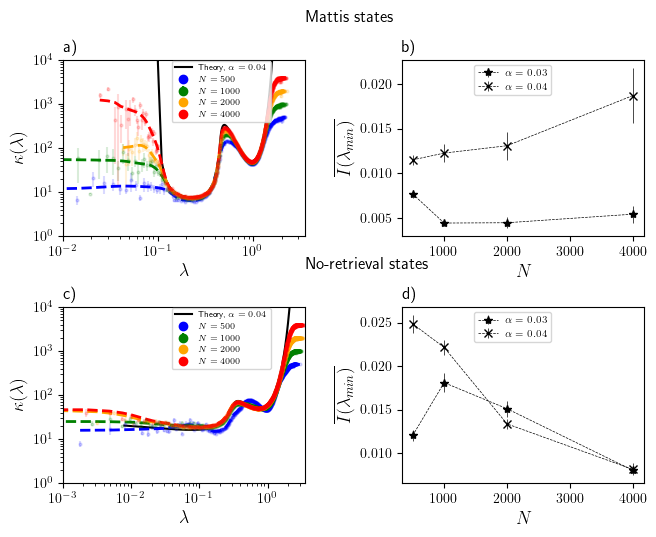

In [5]:
##fig 9: IPR

fig, axs = plt.subplots(2, 2, figsize=(7.5, 5.5))

fig.subplots_adjust(wspace=0.4, hspace=0.4)

## rescaled IPR Matthis states: layout

axs[0, 0].set_xlabel("$ \\lambda $", fontsize=13)
axs[0, 0].set_ylabel("$ \\kappa(\\lambda) $", fontsize=13)
axs[0, 0].set_xscale("log")
axs[0, 0].set_yscale("log")
axs[0, 0].set_xlim(1e-02, 3.5)
axs[0, 0].set_ylim(1, 1e04)

## rescaled IPR spin glass states: layout

axs[1, 0].set_xlabel("$ \\lambda $", fontsize=13)
axs[1, 0].set_ylabel("$ \\kappa(\\lambda) $", fontsize=13)
axs[1, 0].set_xscale("log")
axs[1, 0].set_yscale("log")
axs[1, 0].set_xlim(1e-03, 3.5)
axs[1, 0].set_ylim(1, 1e04)

## IPR smallest mode (empirical data), Matthis states: layout

axs[0, 1].set_xlabel("$ N $", fontsize=13)
axs[0, 1].set_ylabel("$ \overline{I(\\lambda_{min})} $", fontsize=13)
#axs[0, 1].set_xscale("log")
#axs[0, 1].set_yscale("log")
#axs[0, 1].set_xlim(1e-02, 3.5)
#axs[0, 1].set_ylim(1, 1e04)

## IPR smallest mode (empirical data), spin glass states: layout

axs[1, 1].set_xlabel("$ N $", fontsize=13)
axs[1, 1].set_ylabel("$ \overline{I(\\lambda_{min})} $", fontsize=13)

#main.set_title("$d=3, \\alpha=0.04$", fontsize=13)

#inset = plt.axes((0.425, 0.55, 0.2, 0.2))
#inset.set_xlabel("$ N $", fontsize=8)
#inset.set_ylabel("$ \\overline{I_2(\\lambda_{min})} $", fontsize=8)

Ns = [500, 1000, 2000, 4000]

colors = {500: "blue", 1000: "green", 2000: "orange", 4000: "red"}

d=3

fname = folder_in_9+"rescaledIPR_TensorHopfield_freeconv_d=3_alpha=0.04_CloseToPattern.txt"

eigs, iprs = read_data(fname)

axs[0, 0].plot(eigs, iprs*3*(1-1/d), color="black", label="Theory, $ \\alpha=0.04 $")

fname = folder_in_9+"rescaledIPR_TensorHopfield_freeconv_d=3_alpha=0.04_farFromPatterns.txt"

eigs_sg, iprs_sg = read_data(fname)

axs[1, 0].plot(eigs_sg, iprs_sg*3*(1-1/d), color="black", label="Theory, $ \\alpha=0.04 $")

for N in Ns:

    P = np.int64(0.04*N)

    fname = folder_in_9+f"avgiprs_VS_binnedEigs_N{N}_d3_P{P}_CloseToPattern.txt"

    eigs, iprs, iprs_err = read_data(fname)
    
    
    if N == 2000:
        axs[0, 0].plot(eigs[iprs_err>0][10:], gaussian_filter1d(iprs[iprs_err>0]*N, 3.)[10:], linestyle="--", color=colors[N], linewidth=2.)
        axs[0, 0].errorbar(eigs[iprs_err>0][10:], iprs[iprs_err>0][10:]*N, yerr=iprs_err[iprs_err>0][10:]*N, fmt="o", alpha=0.15, ms=2., color=colors[N])
    else:
        axs[0, 0].plot(eigs[iprs_err>0], gaussian_filter1d(iprs[iprs_err>0]*N, 3.), linestyle="--", color=colors[N], linewidth=2.)
        axs[0, 0].errorbar(eigs[iprs_err>0], iprs[iprs_err>0]*N, yerr=iprs_err[iprs_err>0]*N, fmt="o", alpha=0.15, ms=2., color=colors[N])
    
    axs[0, 0].errorbar(np.zeros(0), np.zeros(0), np.zeros(0), label=f"$ N={N} $", fmt="o", color=colors[N])
    
    fname = folder_in_9+f"avgiprs_VS_binnedEigs_N{N}_d3_P{P}_farFromPatterns.txt"

    eigs_sg, iprs_sg, iprs_sg_err = read_data(fname)
    
    axs[1, 0].plot(eigs_sg, gaussian_filter1d(iprs_sg*N, 3.), linestyle="--", color=colors[N], linewidth=2.)
    axs[1, 0].errorbar(eigs_sg, iprs_sg*N, yerr=iprs_sg_err*N, fmt="o", alpha=0.15, ms=2., color=colors[N])
    axs[1, 0].errorbar(np.zeros(0), np.zeros(0), np.zeros(0), label=f"$ N={N} $", fmt="o", color=colors[N])

alphas = [0.03, 0.04]
markers = {0.02:"o", 0.03: "*", 0.04:"x"}

for alpha in alphas:

    if alpha == 0.04:

        iprs_min = []
        iprs_min_err = []
    
        iprs_min_sg = []
        iprs_min_sg_err = []
        
        for N in Ns:

            P = np.int64(alpha*N)

            fname = folder_in_9+f"spectrum_and_iprs_averages_N{N}_d3_P{P}_CloseToPattern_minima.txt"
        
            iprs, iprs_err = read_data(fname, usecols=(3, 4))
        
            iprs_min.append(iprs[0])
            iprs_min_err.append(iprs_err[0])

            fname = folder_in_9+f"spectrum_and_iprs_averages_N{N}_d3_P{P}_farFromPatterns_minima.txt"
        
            iprs, iprs_err = read_data(fname, usecols=(3, 4))
        
            iprs_min_sg.append(iprs[0])
            iprs_min_sg_err.append(iprs_err[0])
        
        Nss = [500, 1000, 2000, 4000]
        axs[0, 1].errorbar(Nss, iprs_min, iprs_min_err, color="black", marker=markers[alpha], linestyle="--", linewidth=.5, label=f"$ \\alpha={alpha} $")
        axs[1, 1].errorbar(Nss, iprs_min_sg, iprs_min_sg_err, color="black", marker=markers[alpha], linestyle="--", linewidth=.5, label=f"$ \\alpha={alpha} $")

    else:

        fname = folder_in_9+f"iprMINavg_VS_N_alpha={alpha}_CloseToPattern.dat"
    
        Nss, iprs_min, iprs_min_err = np.transpose(np.loadtxt(fname))

        fname = folder_in_9+f"iprMINavg_VS_N_alpha={alpha}_farFromPatterns.dat"
    
        Nss, iprs_min_sg, iprs_min_sg_err = np.transpose(np.loadtxt(fname))

        axs[0, 1].errorbar(Nss, iprs_min, iprs_min_err, color="black", marker=markers[alpha], linestyle="--", linewidth=.5, label=f"$ \\alpha={alpha} $")
        axs[1, 1].errorbar(Nss, iprs_min_sg, iprs_min_sg_err, color="black", marker=markers[alpha], linestyle="--", linewidth=.5, label=f"$ \\alpha={alpha} $")
        
axs[0, 0].legend(loc=(0.45,0.65), fontsize=6)
axs[1, 0].legend(loc=(0.45,0.65), fontsize=6)
axs[0, 1].legend(loc=(0.3, 0.8), fontsize=7)
axs[1, 1].legend(loc=(0.3, 0.8), fontsize=7)

axs[0, 0].set_title("a)", loc="left", fontsize=12)
axs[0, 1].set_title("b)", loc="left", fontsize=12)
axs[1, 0].set_title("c)", loc="left", fontsize=12)
axs[1, 1].set_title("d)", loc="left", fontsize=12)

fig.text(0.45, 0.95, "Mattis states", fontsize=12)
fig.text(0.45, 0.50, "No-retrieval states", fontsize=12)

plt.savefig(folder_out_9+"iprs_d=3_compare_with_data_Matthis_and_sg.png", bbox_inches="tight", dpi=300)
plt.show()
